In [45]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import math
import numpy

In [235]:
class LinearRegression:
    def fit(self, X, y, learning_rate=0.01, iterations=500, batch_size=32):
    
        X, y = torch.from_numpy(X), torch.from_numpy(y)
#         print("x before ",X)
        
        X = torch.cat([(X), torch.ones_like(y)], dim=1)
#         print("x after ",X)
        
        rows, cols = X.size()
        self.weights = torch.normal(mean=0, std=1/cols, size=(cols, 1), dtype=torch.float64)
        
        print('weight',self.weights)
#         self.weights = 1
    
        for i in range(iterations):
            Xy = torch.cat([X, y], dim=1)
            Xy = Xy[torch.randperm(Xy.size()[0])]
            X, y = torch.split(Xy, [Xy.size()[1]-1, 1], dim=1)
            for j in range(int(math.ceil(rows/batch_size))):
                start, end = batch_size*j, min(batch_size*(j+1), rows)
                Xb = torch.index_select(X, 0, torch.arange(start, end))
                yb = torch.index_select(y, 0, torch.arange(start, end))

                self.weights.requires_grad_(True)
                diff = torch.matmul(Xb, self.weights) - yb
                loss = torch.matmul(torch.transpose(diff, 0, 1), diff)
                loss.backward()

                self.weights = (self.weights - learning_rate*self.weights.grad).detach()

        
        return self
    
    def predict(self, X):
        X = torch.from_numpy(X)
        if not hasattr(self, 'weights'):
            print('Cannot predict. You should call the .fit() method first.')
            return
        
        X = torch.cat([X, torch.ones((X.size()[0], 1))], dim=1)
        
        if X.size()[1] != self.weights.size()[0]:
            print(f'Shapes do not match. {X.size()[1]} != {self.weights.size()[0]}')
            return
        
        return torch.matmul(X, self.weights)
    
    def rmse(self, X, y):
        y = torch.from_numpy(y)
        y_hat = self.predict(X)
        
        if y_hat is None:
            return
        
        return torch.sqrt(torch.mean(torch.square(y_hat - y)))

In [227]:
import csv

X = []
y = []

with open('length_weight.csv') as csvfile:
    csv_data = csv.reader(csvfile, delimiter=',', quotechar='|')
    
#   skip headers  
    next(csv_data)
    
    for row in csv_data:
        X.append(float(row[0])/100)
        y.append(float(row[1]))
        
X = numpy.array(X[0:10]).reshape((-1, 1))
y = numpy.array(y[0:10])

In [221]:
X, y = make_regression(n_features=1, n_informative=1, bias=1, noise=35)

In [228]:
X = X[0:5]
y = y[0:5]

In [229]:
print("X: ",X[0:10])
print("Y: ",y[0:10])

X:  [[0.807]
 [0.804]
 [0.725]
 [1.03 ]
 [1.076]]
Y:  [11.26768032 11.95844519  8.31746162 18.80844309 19.47419294]


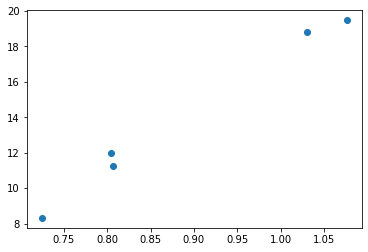

In [230]:
plt.scatter(X, y)

In [231]:
y = y.reshape((-1, 1))

## Fit with Stochastic gradient descent 

In [236]:
lr_sgd = LinearRegression().fit(X, y)

weight tensor([[-0.5985],
        [-0.0765]], dtype=torch.float64)


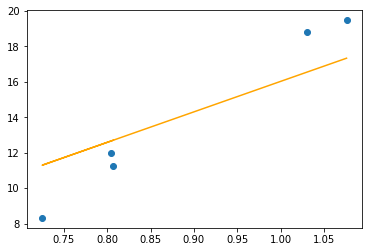

In [233]:
plt.scatter(X, y)
plt.plot(X, lr_sgd.predict(X), color='orange')

In [234]:
lr_sgd.rmse(X, y)

tensor(2.0556, dtype=torch.float64)